In [0]:
def num_to_let(arr):
  return chr(arr+97)

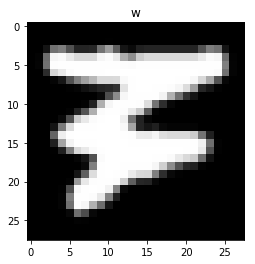

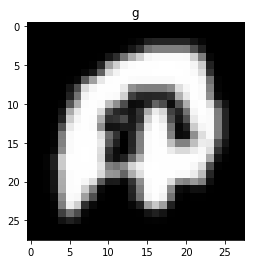

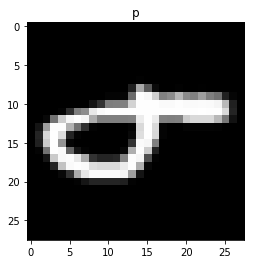

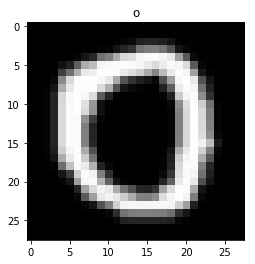

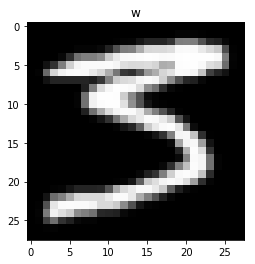

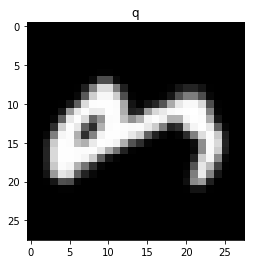

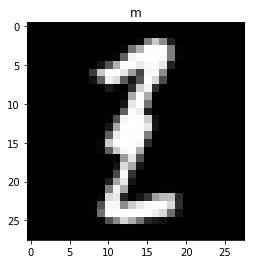

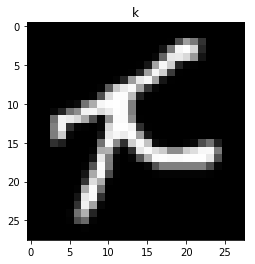

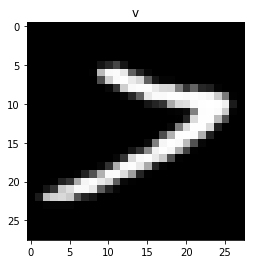

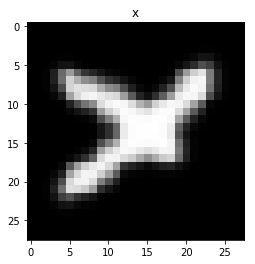

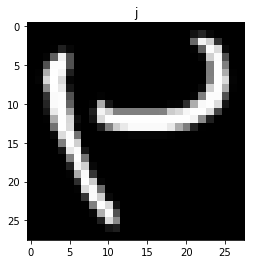

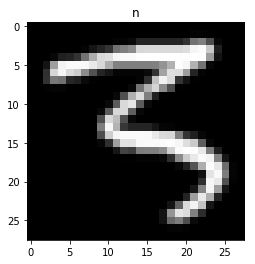

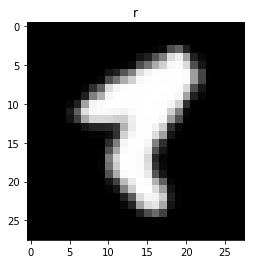

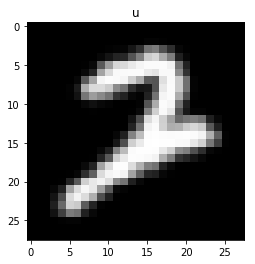

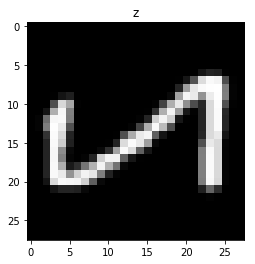

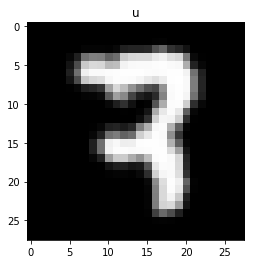

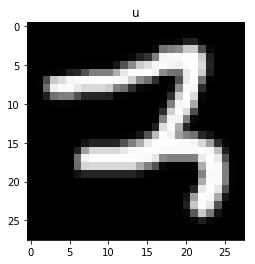

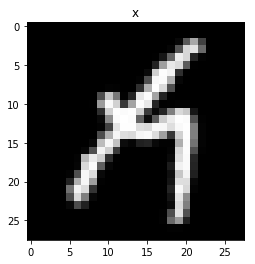

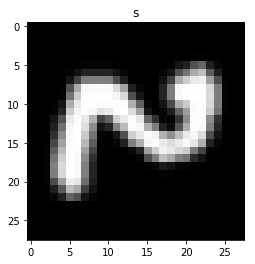

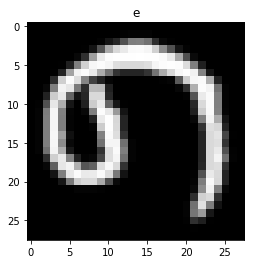

In [0]:
from skimage import color
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization,AvgPool2D
from tensorflow.keras import Sequential
#data link: https://cloudstor.aarnet.edu.au/plus/index.php/s/54h3OuGJhFLwAlQ/download
!pip install idx2numpy
import idx2numpy

Xtr1 = idx2numpy.convert_from_file('emnist-letters-train-images-idx3-ubyte')
Ytr = idx2numpy.convert_from_file('emnist-letters-train-labels-idx1-ubyte')

Xts1 = idx2numpy.convert_from_file('emnist-letters-test-images-idx3-ubyte')
Yts = idx2numpy.convert_from_file('emnist-letters-test-labels-idx1-ubyte')
for x in range(0,20):
  plt.figure()
  plt.title(num_to_let(Ytr[x]-1))
  plt.imshow(Xtr1[x],cmap="gray")
  

In [0]:
Xtr=[]
Xts=[]
for x in range(len(Xtr1)):
  Xtr.append(color.rgb2gray(Xtr1[x]))
for x in range(len(Xts1)):
  Xts.append(color.rgb2gray(Xts1[x]))

In [0]:
Xtr=np.array(Xtr).reshape(-1,28,28,1)
Xts=np.array(Xts).reshape(-1,28,28,1)
Xtr_sc= Xtr/255
Xts_sc= Xts/255
Ytr=Ytr-1
Yts=Yts-1

In [0]:
print("train",Xtr.shape,Ytr.shape)
print("test",Xts.shape, Yts.shape)

train (124800, 28, 28, 1) (124800,)
test (20800, 28, 28, 1) (20800,)


In [0]:
K.clear_session()

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1), activation='relu', name='convlayer1',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(32,(2,2), activation='relu', name='convlayer2',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Flatten())
model.add(Dense(256,activation='relu', name='dlayer1',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu', name='dlayer2',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(26, activation='softmax', name='dlayer7'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convlayer1 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
convlayer2 (Conv2D)          (None, 7, 7, 32)          4128      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dlayer1 (Dense)              (None, 256)               401664    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dlayer2 (Dense)              (None, 128)               3

In [0]:
opt = tf.keras.optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mod = model.fit(Xtr_sc, Ytr, epochs=15, batch_size=1000, validation_split=0.1)

Train on 112320 samples, validate on 12480 samples
Epoch 1/15
112320/112320 [==============================] - 2s 20us/sample - loss: 15.0514 - acc: 0.7804 - val_loss: 4.4420 - val_acc: 0.0382
Epoch 2/15
112320/112320 [==============================] - 2s 16us/sample - loss: 0.9016 - acc: 0.8860 - val_loss: 3.4378 - val_acc: 0.0694
Epoch 3/15
112320/112320 [==============================] - 2s 16us/sample - loss: 0.5860 - acc: 0.8936 - val_loss: 3.1511 - val_acc: 0.1833
Epoch 4/15
112320/112320 [==============================] - 2s 16us/sample - loss: 0.5322 - acc: 0.9001 - val_loss: 2.5126 - val_acc: 0.6389
Epoch 5/15
112320/112320 [==============================] - 2s 16us/sample - loss: 0.5034 - acc: 0.9029 - val_loss: 1.4626 - val_acc: 0.8185
Epoch 6/15
112320/112320 [==============================] - 2s 16us/sample - loss: 0.4817 - acc: 0.9065 - val_loss: 0.8787 - val_acc: 0.8197
Epoch 7/15
112320/112320 [==============================] - 2s 16us/sample - loss: 0.4620 - acc: 0.909

In [0]:
# from keras.models import load_model
# DO NOT RUN UNTIL END
# model.save('ocrmod.h5')
np.mean(model.predict_classes(Xts_sc)==Yts)

0.8834134615384616

Text(0.5, 1.0, 'x')

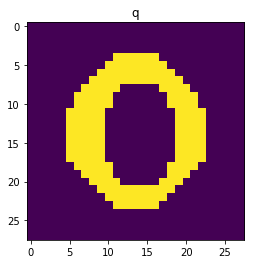

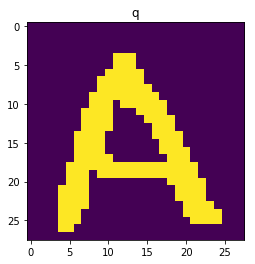

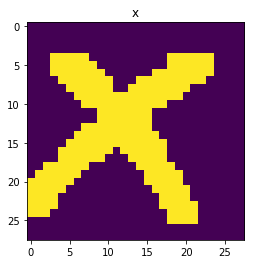

In [0]:
from skimage import color

x=color.rgb2gray(plt.imread('New Piskel (1).png')).reshape(-1,28,28,1)
plt.imshow(x[0,:,:,0])
plt.title((num_to_let(int(model.predict_classes(x)))))
plt.figure()
x=color.rgb2gray(plt.imread('New Piskel (2).png')).reshape(-1,28,28,1)
plt.imshow(x[0,:,:,0])
plt.title((num_to_let(int(model.predict_classes(x)))))
plt.figure()
x=color.rgb2gray(plt.imread('New Piskel (5).png')).reshape(-1,28,28,1)
plt.imshow(x[0,:,:,0])
plt.title((num_to_let(int(model.predict_classes(x)))))

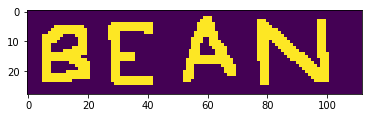

In [0]:
x=color.rgb2gray(plt.imread('New Piskel (7).png')).reshape(-1,28,112,1)
plt.imshow(x[0,:,:,0])


In [0]:
from sklearn.feature_extraction import image

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.99999994]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 